<a href="https://colab.research.google.com/github/MinsooKwak/Mobility/blob/main/Subway/subway_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 활용한 데이터 : 
  - 서울특별시 도시교통실 교통기획관 교통정책과에서 제공
  - 서울시 지하철호선별 역별 승하차 인원 정보를 활용하였음.
  - https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do

In [1]:
#!sudo apt-get install -y fonts-nanum  ## 폰트설치
#!sudo fc-cache -fv ## 폰트 업데이트
#!rm ~/.cache/matplotlib -rf ## 캐쉬된 matplotlib 폰트 삭제하여 재로딩

In [2]:
#import할 패키지 목록
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
import missingno as msno

# 경고를 무시합니다.
import warnings
warnings.filterwarnings("ignore")

# 구글 드라이브 호출
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# ttflist에 Nanum 글자 들어가는 폰트 있는지 확인하는 코드
f = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
f

#폰트종류설정
plt.rcParams["font.family"] ='NanumSquare'

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.13
설정 폰트 글꼴: ['NanumSquare'], 설정 폰트 사이즈: 10.0


In [4]:
# 총 2년치 데이터

# 데이터 1년치
#df_202002 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202002.csv',encoding='cp949')
#df_202003 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202003.csv',encoding='cp949')
df_202004 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202004.csv',encoding='cp949')
df_202005 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202005.csv')
df_202006 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202006.csv')
df_202007 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202007.csv')
df_202008 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202008.csv')
df_202009 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202009.csv',encoding='cp949')
df_202010 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202010.csv')
df_202011 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202011.csv')
df_202012 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202012.csv')
df_202101 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202101.csv')
df_202102 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202102.csv')

# 최신 데이터 1년치
df_202103 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202103.csv')
df_202104 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202104.csv')
df_202105 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202105.csv')
df_202106 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202106.csv')
df_202107 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202107.csv')
df_202108 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202108.csv')
df_202109 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202109.csv')
df_202110 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202110.csv')
df_202111 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202111.csv')
df_202112 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202112.csv')
df_202201 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202201.csv')
df_202202 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202202.csv')
df_202203 = pd.read_csv('/content/drive/MyDrive/data/public_data/subway_data/CARD_SUBWAY_MONTH_202203.csv')

In [5]:
df = pd.concat([df_202004,df_202005,df_202006,df_202007,df_202008,df_202009,df_202010,df_202011,df_202012,df_202101,df_202102,
                df_202103,df_202104,df_202105,df_202105,df_202106,df_202107,df_202108,df_202109,df_202110,df_202111,df_202112,df_202201,df_202202,df_202203])

In [6]:
df.shape

(453169, 6)

2020년 4월부터 2022년 3월까지의 2년치에 대한 데이터는 총 45만건을 초과합니다.

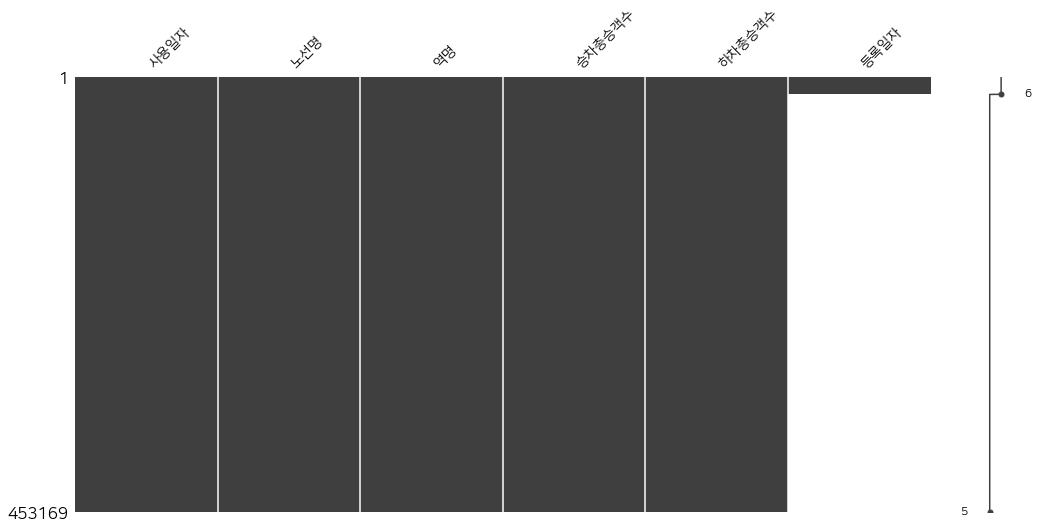

In [7]:
# 결측치 비율 확인
%matplotlib inline
msno.matrix(df, figsize=(17,8), fontsize=14);

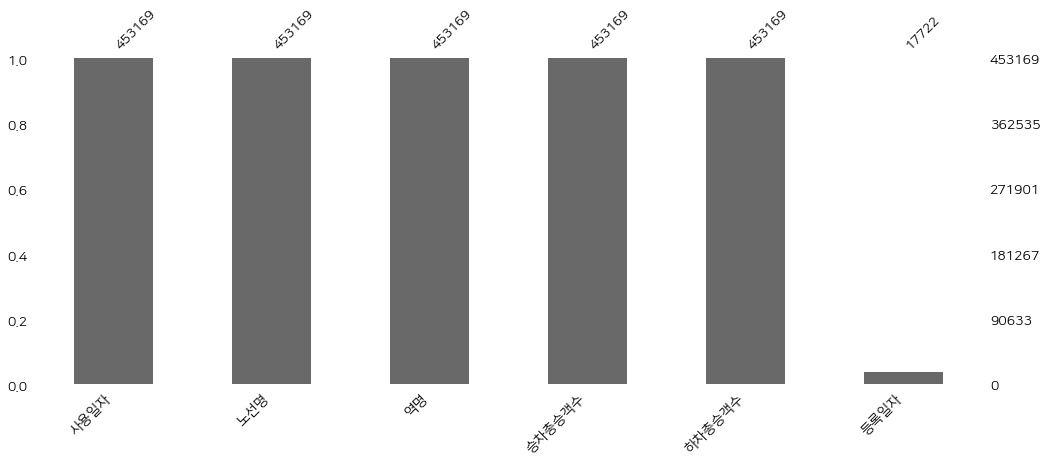

In [8]:
msno.bar(df, figsize=(17,6), fontsize=14);

In [9]:
df[~df['등록일자'].isna()]

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20200401,장항선,아산,1557.0,1426.0,20200404.0
1,20200401,1호선,종각,31105.0,30397.0,20200404.0
2,20200401,1호선,종로3가,21991.0,20842.0,20200404.0
3,20200401,1호선,종로5가,18925.0,19126.0,20200404.0
4,20200401,1호선,동대문,9482.0,9373.0,20200404.0
...,...,...,...,...,...,...
17717,20200430,7호선,상동,7730.0,7786.0,20200503.0
17718,20200430,7호선,삼산체육관,2616.0,2286.0,20200503.0
17719,20200430,7호선,굴포천,4990.0,5027.0,20200503.0
17720,20200430,7호선,부평구청,5413.0,4684.0,20200503.0


등록일자에 대한 데이터는 2020년 4월의 데이터를 제외하고 전부 등록되어 있지 않은 것으로 나타난다.

따라서 해당 feature는 제거해주도록 하겠다.